# **Labwork1. Exploring and visualising data with Python**

## **Objective: to gain basic skills in using Python for data research and visualisation.**

## Task:
1. Download the `russia_losses_equipment.csv` file from Kaggle.com  
   [https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war](https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war)
2. Choose one variant for this laboratory work, using the formula:  
   **N = ord("LLL") % 3 + 1**,  
   where N is the variant number and LLL is the first letter of your name.
3. Tips:  
    a. Use the `csv.reader()` function to read the CSV file.  
    b. Skip the first row (with column headers).  
    c. Do not use loops or other iterative constructs for processing NumPy arrays. Use only slicing and/or universal (vectorized) functions.  
    d. Create functions for tasks 3-7 for each variant.
4. Requirements for plots:  
   a. Set the line type (dashed, etc.);  
   b. The plots should be labeled;  
   c. Add a legend;  
   d. Add a grid and specify the color and line type;  
   e. Add a title to the plot, axis labels, and values on the axes;  
   f. Change the size of the plot (e.g., 8x16 inches) and resolution (e.g., 100 dpi);  
   g. Save the plot to a PNG file.

In [1]:
N = ord("D") % 3 + 1
print(f"Denys Kolesnychenko's variant: {N}")

Denys Kolesnychenko's variant: 3


## Variant 3. Study of Armored Personnel Carrier (APC) losses.
1. Create a function that takes the filename and column name as parameters and returns a NumPy array with the column values.
2. Using the function from the previous task, create a NumPy array with the values of the "APC" column (Armored Personnel Carrier).
3. Calculate daily APC losses.
4. Find the 5 highest daily APC losses.
5. Determine how many APCs were destroyed in the summer of 2023.
6. Find the average number of destroyed APCs over the 100-500 days of the war.
7. Create a plot of APC losses for the last 200 days (starting from the last date in the dataset).

## Completion of the task

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta
import time
import csv
import os

DATA_FOLDER_PATH = 'data'
LOSSES_FILE_NAME = 'russia_losses_equipment.csv'
LOSSES_FILE_PATH = os.path.join(DATA_FOLDER_PATH, LOSSES_FILE_NAME)
LOSSES_COLUMN_NAME = 'APC'
WAR_START_DATE = date(2022, 2, 24)
# Task 5
START_DATE = date(2023, 6, 1)
END_DATE = date(2023, 8, 31)
# Task 6
START_DATE_NUMBER = 100
END_DATE_NUMBER = 500
# Task 7
LAST_N_DAYS = 200
RESULT_FOLDER_PATH = 'result'
RESULT_FILE_NAME = f'{LOSSES_COLUMN_NAME}_losses_graph_{LAST_N_DAYS}_days.png'
RESULT_FILE_PATH = os.path.join(RESULT_FOLDER_PATH, RESULT_FILE_NAME)


def get_int_column_data_as_numpy_array(source_file, column_name):
    if not os.path.exists(source_file):
        raise FileNotFoundError(f"File '{source_file}' not found.")

    try:
        with open(source_file, 'r', encoding='utf-8') as file:
            reader = csv.reader(file, delimiter=',')
            headers = next(reader)

            if column_name not in headers:
                raise ValueError(f"Column '{column_name}' not found in headers.")

            column_index = headers.index(column_name)

            column_data = []

            for row in reader:
                value = row[column_index]
                if value == "":
                    raise ValueError(f"Missing value in column '{column_name}' at line {reader.line_num}.")
                try:
                    column_data.append(int(value))
                except ValueError:
                    raise ValueError(f"Invalid value '{row[column_index]}' in column '{column_name}' at line {reader.line_num}.")

            column_data.append(0)

            return np.array(column_data)
    except FileNotFoundError:
        raise FileNotFoundError(f"File '{source_file}' cannot be opened.")


try:
    cumulative_losses_data = get_int_column_data_as_numpy_array(LOSSES_FILE_PATH, LOSSES_COLUMN_NAME)
    print(f"Cumulative {LOSSES_COLUMN_NAME} losses for each day of the war:\n{cumulative_losses_data}")
except Exception as e:
    print(f"Error: {e}")


Cumulative APC losses for each day of the war:
[17222 17170 17132 17093 17080 17077 17071 17063 17043 17003 16955 16938
 16925 16906 16897 16878 16878 16869 16848 16821 16786 16760 16736 16722
 16699 16681 16667 16648 16631 16620 16599 16567 16542 16521 16495 16480
 16473 16461 16426 16402 16385 16368 16363 16350 16341 16332 16323 16294
 16286 16255 16238 16211 16203 16161 16141 16103 16095 16074 16050 16039
 16013 16000 15980 15963 15917 15902 15883 15871 15862 15826 15811 15779
 15755 15732 15715 15704 15685 15645 15629 15611 15600 15583 15566 15550
 15524 15505 15480 15459 15450 15431 15413 15398 15383 15372 15337 15319
 15307 15287 15269 15263 15234 15208 15187 15176 15144 15131 15105 15096
 15076 15036 15020 15002 14980 14947 14935 14913 14891 14858 14818 14803
 14786 14775 14748 14721 14699 14665 14630 14595 14552 14538 14508 14460
 14417 14375 14353 14313 14281 14246 14227 14213 14179 14156 14129 14096
 14067 14046 14007 13991 13971 13957 13942 13928 13916 13904 13896 13873
 138

In [3]:
def calculate_daily_losses(cumulative_losses_data):
    if len(cumulative_losses_data) < 2:
        raise ValueError("Not enough data to calculate daily losses.")

    return -np.diff(cumulative_losses_data)


try:
    daily_losses_data = calculate_daily_losses(cumulative_losses_data)
    print(f"\nDaily {LOSSES_COLUMN_NAME} losses:\n{daily_losses_data}")
except Exception as e:
    print(f"Error: {e}")



Daily APC losses:
[ 52  38  39  13   3   6   8  20  40  48  17  13  19   9  19   0   9  21
  27  35  26  24  14  23  18  14  19  17  11  21  32  25  21  26  15   7
  12  35  24  17  17   5  13   9   9   9  29   8  31  17  27   8  42  20
  38   8  21  24  11  26  13  20  17  46  15  19  12   9  36  15  32  24
  23  17  11  19  40  16  18  11  17  17  16  26  19  25  21   9  19  18
  15  15  11  35  18  12  20  18   6  29  26  21  11  32  13  26   9  20
  40  16  18  22  33  12  22  22  33  40  15  17  11  27  27  22  34  35
  35  43  14  30  48  43  42  22  40  32  35  19  14  34  23  27  33  29
  21  39  16  20  14  15  14  12  12   8  23  21  17   8  18  13  31  20
  47  19  12  47  45  24  54  38  73  18  18  29  17  20  20  27  21   9
  24  25  28  19  37  16   9  35  17  24  24  11  17  20  27  24  27  25
  19  51  40  28  21  28  29  30  44  14  16  37  16  15  37  35  70  36
  34  53  16  39  47  39  27  21  14  21  22  20  22  35   4  13  13  19
  16  32  29  25  19  15  16  42

In [4]:
def get_top_n_losses(daily_losses_data, n=5):
    if len(daily_losses_data) < n:
        raise ValueError(f"Not enough values. Requested {n}, available {len(daily_losses_data)}")
    return np.sort(daily_losses_data)[-1:-(n + 1):-1]


def get_top_n_unique_losses(daily_losses_data, n=5):
    unique_losses = np.unique(daily_losses_data)

    if len(unique_losses) < n:
        raise ValueError(f"There are not enough unique values. Requested {n}, available {len(unique_losses)}")

    top_n_unique = get_top_n_losses(unique_losses, n)

    return top_n_unique


try:
    top_5_losses = get_top_n_losses(daily_losses_data)
    print(f"\nTop 5 daily {LOSSES_COLUMN_NAME} losses:\n{top_5_losses}")

    top_5_unique_losses = get_top_n_unique_losses(daily_losses_data)
    print(f"\nTop 5 unique daily {LOSSES_COLUMN_NAME} losses:\n{top_5_unique_losses}")

    top_10_losses = get_top_n_losses(daily_losses_data, 10)
    print(f"\nTop 10 daily {LOSSES_COLUMN_NAME} losses:\n{top_10_losses}")

    top_10_unique_losses = get_top_n_unique_losses(daily_losses_data, 10)
    print(f"\nTop 10 unique daily {LOSSES_COLUMN_NAME} losses:\n{top_10_unique_losses}")
except Exception as e:
    print(f"Error: {e}")



Top 5 daily APC losses:
[516 190 120 110  96]

Top 5 unique daily APC losses:
[516 190 120 110  96]

Top 10 daily APC losses:
[516 190 120 110  96  91  73  70  60  60]

Top 10 unique daily APC losses:
[516 190 120 110  96  91  73  70  60  59]


In [5]:
def validate_period_indices(start_day_number, end_day_number, data_length):
    if start_day_number <= 0:
        raise ValueError("Start day index is out of bounds (should be > 0)")
    if end_day_number >= data_length:
        raise ValueError("End day index is out of bounds (should be < length of data)")
    if start_day_number > end_day_number:
        raise ValueError("Start day index is greater than end day index")


def calculate_war_day(specific_date, war_start_date):
    if isinstance(specific_date, datetime):
        specific_date = specific_date.date()
    elif not isinstance(specific_date, date):
        raise ValueError("specific_date must be a date or datetime object")

    if specific_date < war_start_date:
        raise ValueError("The date can't be earlier than the start of the war")

    days_passed = (specific_date - war_start_date).days + 1
    return days_passed


def calculate_losses_for_period(cumulative_losses_data, start_day_number, end_day_number):
    validate_period_indices(start_day_number, end_day_number, len(cumulative_losses_data))

    start_index = len(cumulative_losses_data) - start_day_number
    end_index = len(cumulative_losses_data) - end_day_number - 1

    start_time = time.perf_counter()
    losses = cumulative_losses_data[end_index] - cumulative_losses_data[start_index]
    end_time = time.perf_counter()

    print(f"Execution time(calculate_losses_for_period): {(end_time - start_time):.6f}")
    return losses


def calculate_losses_sum_for_period(daily_losses_data, start_day_number, end_day_number):
    validate_period_indices(start_day_number, end_day_number, len(daily_losses_data))

    start_index = len(daily_losses_data) - start_day_number + 1
    end_index = len(daily_losses_data) - end_day_number

    start_time = time.perf_counter()
    total_losses = np.sum(daily_losses_data[end_index:start_index])
    end_time = time.perf_counter()

    print(f"Execution time(calculate_losses_sum_for_period): {(end_time - start_time):.6f}")
    return total_losses


try:
    print("\nUsing calculate_losses_for_period:")
    period_losses = calculate_losses_for_period(cumulative_losses_data, 
                                                calculate_war_day(START_DATE, WAR_START_DATE), 
                                                calculate_war_day(END_DATE, WAR_START_DATE))
    print(f"{LOSSES_COLUMN_NAME} losses from {START_DATE} to {END_DATE}: {period_losses}")

    print(
        "\nUsing calculate_losses_sum_for_period:")
    period_losses_sum = calculate_losses_sum_for_period(daily_losses_data, 
                                                        calculate_war_day(START_DATE, WAR_START_DATE), 
                                                        calculate_war_day(END_DATE, WAR_START_DATE))
    print(f"{LOSSES_COLUMN_NAME} losses from {START_DATE} to {END_DATE}: {period_losses_sum}")
except Exception as e:
    print(f"Error: {e}")



Using calculate_losses_for_period:
Execution time(calculate_losses_for_period): 0.000009
APC losses from 2023-06-01 to 2023-08-31: 1135

Using calculate_losses_sum_for_period:
Execution time(calculate_losses_sum_for_period): 0.000050
APC losses from 2023-06-01 to 2023-08-31: 1135


In [6]:
def calculate_average_losses_for_period(cumulative_losses_data, start_day_number, end_day_number):
    validate_period_indices(start_day_number, end_day_number, len(cumulative_losses_data))

    start_index = len(cumulative_losses_data) - start_day_number
    end_index = len(cumulative_losses_data) - end_day_number - 1

    start_time = time.perf_counter()
    losses = cumulative_losses_data[end_index] - cumulative_losses_data[start_index]
    average_losses = losses / (end_day_number - start_day_number + 1)
    end_time = time.perf_counter()

    print(f"Execution time(calculate_average_losses_for_period): {(end_time - start_time):.6f}")
    return average_losses


def calculate_average_losses_sum_for_period(daily_losses_data, start_day_number, end_day_number):
    validate_period_indices(start_day_number, end_day_number, len(daily_losses_data))

    start_index = len(daily_losses_data) - start_day_number + 1
    end_index = len(daily_losses_data) - end_day_number

    start_time = time.perf_counter()
    average_losses = np.mean(daily_losses_data[end_index:start_index])
    end_time = time.perf_counter()

    print(f"Execution time(calculate_average_losses_sum_for_period): {(end_time - start_time):.6f}")
    return average_losses


try:
    print("\nUsing calculate_average_losses_for_period:")
    average_losses = calculate_average_losses_for_period(cumulative_losses_data, START_DATE_NUMBER, END_DATE_NUMBER)
    print(f"Average {LOSSES_COLUMN_NAME} losses from day {START_DATE_NUMBER} to day {END_DATE_NUMBER}: {average_losses:.2f}")

    print("\nUsing calculate_average_losses_sum_for_period:")
    average_losses_sum = calculate_average_losses_sum_for_period(daily_losses_data, START_DATE_NUMBER, END_DATE_NUMBER)
    print(f"Average {LOSSES_COLUMN_NAME} losses from day {START_DATE_NUMBER} to day {END_DATE_NUMBER}: {average_losses_sum:.2f}")
except Exception as e:
    print(f"Error: {e}")



Using calculate_average_losses_for_period:
Execution time(calculate_average_losses_for_period): 0.000024
Average APC losses from day 100 to day 500: 11.47

Using calculate_average_losses_sum_for_period:
Execution time(calculate_average_losses_sum_for_period): 0.000075
Average APC losses from day 100 to day 500: 11.47



The graph is saved to a file: result\APC_losses_graph_500_days.png


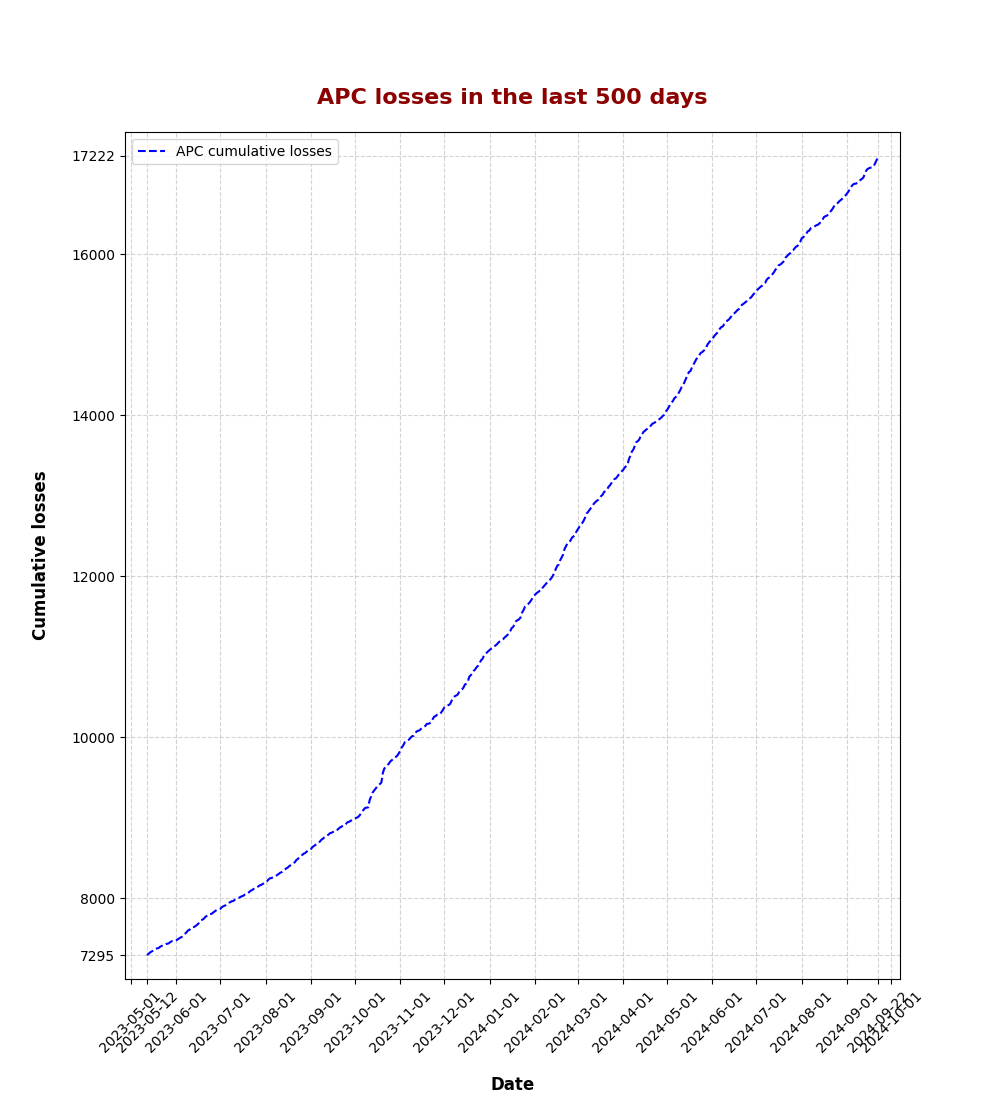

In [7]:
%matplotlib widget


def get_latest_date(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File '{file_path}' not found.")
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            reader = csv.reader(file)
            headers = next(reader)
            date_index = headers.index('date')
            first_row = next(reader)
            latest_date = datetime.strptime(first_row[date_index], '%Y-%m-%d').date()
            return latest_date
    except FileNotFoundError:
        raise FileNotFoundError(f"File '{file_path}' cannot be opened.")


def prepare_data_for_graph(file_path, cumulative_losses_data, last_n_days):
    latest_date = get_latest_date(file_path)
    start_date = latest_date - timedelta(days=last_n_days - 1)
    dates = [(start_date + timedelta(days=i)) for i in range(last_n_days)]
    last_n_days_cumulative_losses = cumulative_losses_data[last_n_days - 1::-1]
    return dates, last_n_days_cumulative_losses


def plot_cumulative_losses(dates, last_n_days_cumulative_losses, result_file, column_name, last_n_days):
    plt.figure(figsize=(10, 11), dpi=100)
    plt.plot(dates, last_n_days_cumulative_losses, linestyle='--', color='blue', label=f'{column_name} cumulative losses')

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    xticks = ax.get_xticks()
    new_ticks = np.array([mdates.date2num(dates[0]), mdates.date2num(dates[-1])])
    combined_xticks = np.concatenate((xticks, new_ticks))
    xticklabels = [tick.get_text() for tick in ax.get_xticklabels()]
    combined_xticklabels = xticklabels + [dates[0].strftime('%Y-%m-%d'), dates[-1].strftime('%Y-%m-%d')]
    ax.set_xticks(combined_xticks)
    ax.set_xticklabels(combined_xticklabels, rotation=45)

    x_range = mdates.date2num(dates[-1]) - mdates.date2num(dates[0])
    x_buffer = x_range * 0.03
    ax.set_xlim(mdates.num2date(mdates.date2num(dates[0]) - x_buffer),
                mdates.num2date(mdates.date2num(dates[-1]) + x_buffer))

    yticks = ax.get_yticks()
    new_ticks = np.array([min(last_n_days_cumulative_losses), max(last_n_days_cumulative_losses)])
    combined_ticks = np.concatenate((yticks, new_ticks))
    ax.set_yticks(combined_ticks)
    ax.set_yticklabels([f'{int(tick)}' for tick in combined_ticks])

    y_buffer = (max(last_n_days_cumulative_losses) - min(last_n_days_cumulative_losses)) * 0.03
    ax.set_ylim(min(last_n_days_cumulative_losses) - y_buffer, max(last_n_days_cumulative_losses) + y_buffer)

    plt.title(f'{column_name} losses in the last {last_n_days} days',
              fontsize=16, fontweight='bold', color='darkred', pad=20)
    plt.xlabel('Date', fontsize=12, labelpad=15, fontweight='bold')
    plt.ylabel('Cumulative losses', fontsize=12, labelpad=15, fontweight='bold')

    plt.grid(True, linestyle='--', color='darkgray', alpha=0.5)

    plt.legend()

    plt.savefig(result_file)
    print(f"\nThe graph is saved to a file: {result_file}")
    plt.show()


try:
    dates, last_n_days_cumulative_losses = prepare_data_for_graph(LOSSES_FILE_PATH, cumulative_losses_data, LAST_N_DAYS)
    plot_cumulative_losses(dates, last_n_days_cumulative_losses, RESULT_FILE_PATH, LOSSES_COLUMN_NAME, LAST_N_DAYS)
except Exception as e:
    print(f"Error: {e}")


In [8]:
# plt.close()